In [157]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as dt

In [158]:
df=pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [159]:
sns.set_style('darkgrid')
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

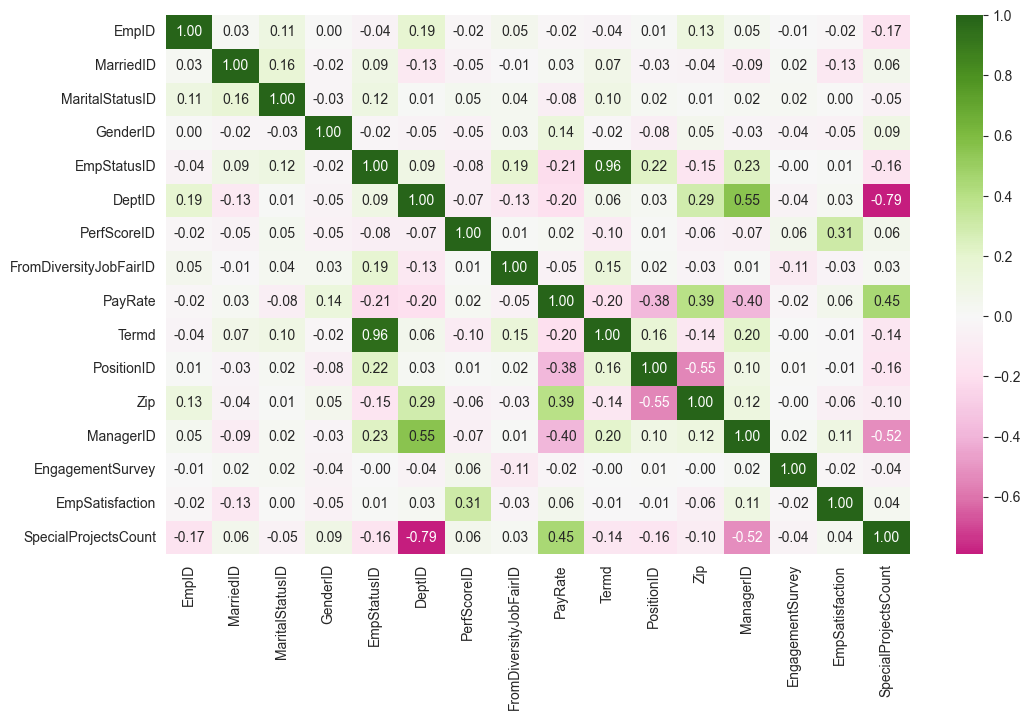

In [160]:

plt.figure(figsize = (12.0,7.0))
sns.heatmap(df.corr(),xticklabels= df.corr().columns.values,yticklabels=df.corr().columns.values, cmap = cm.PiYG, center = 0., annot = True, fmt = '.2f' )
plt.show()


Istnieje ledwozauważalna negatywna korelacja między ManagerID a PerformanceScore - -0.07


<AxesSubplot:xlabel='PerfScoreID', ylabel='ManagerName'>

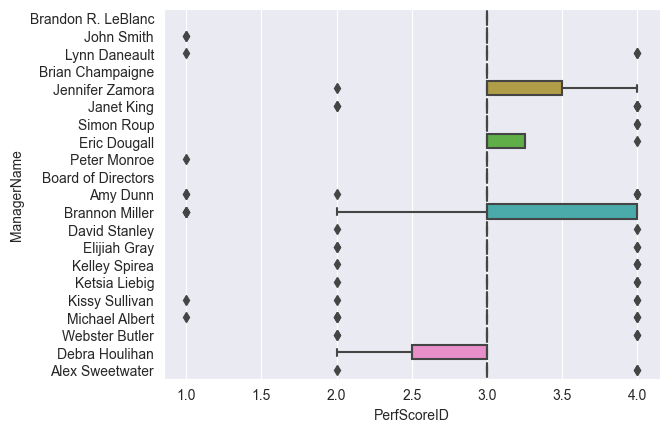

In [161]:
# 1 Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
print("Istnieje ledwozauważalna negatywna korelacja między ManagerID a PerformanceScore - -0.07")
df.columns.to_list()
sns.boxplot(y='ManagerName',x='PerfScoreID',data=df)
#df['PerfScore'].value_counts()

Najlepiej zatrudniać z następujących źródeł: Website Banner Ads, MBTA Ads i Billboard, jeśli zależy nam na najdłuższym stażu pracowników


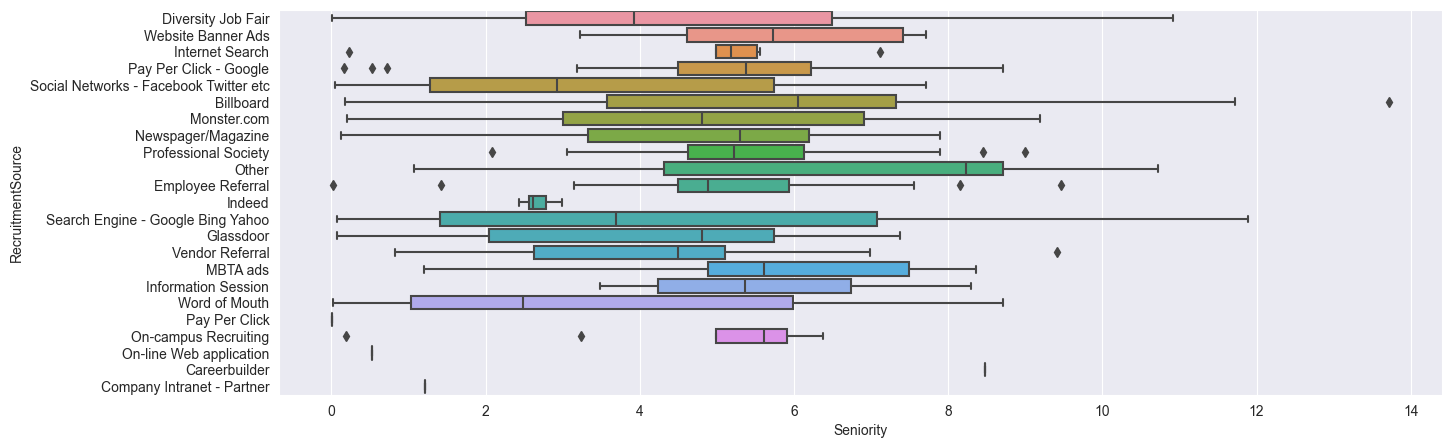

In [162]:
# 2 Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

from statistics import median


def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

plt.figure(figsize=(15,5))
sns.boxplot(y='RecruitmentSource',x='Seniority',data=df)

print('Najlepiej zatrudniać z następujących źródeł: Website Banner Ads, MBTA Ads i Billboard, jeśli zależy nam na najdłuższym stażu pracowników')


Nie ma żadnej koralacji między stanem cywilnym, a zadowoleniem z pracy


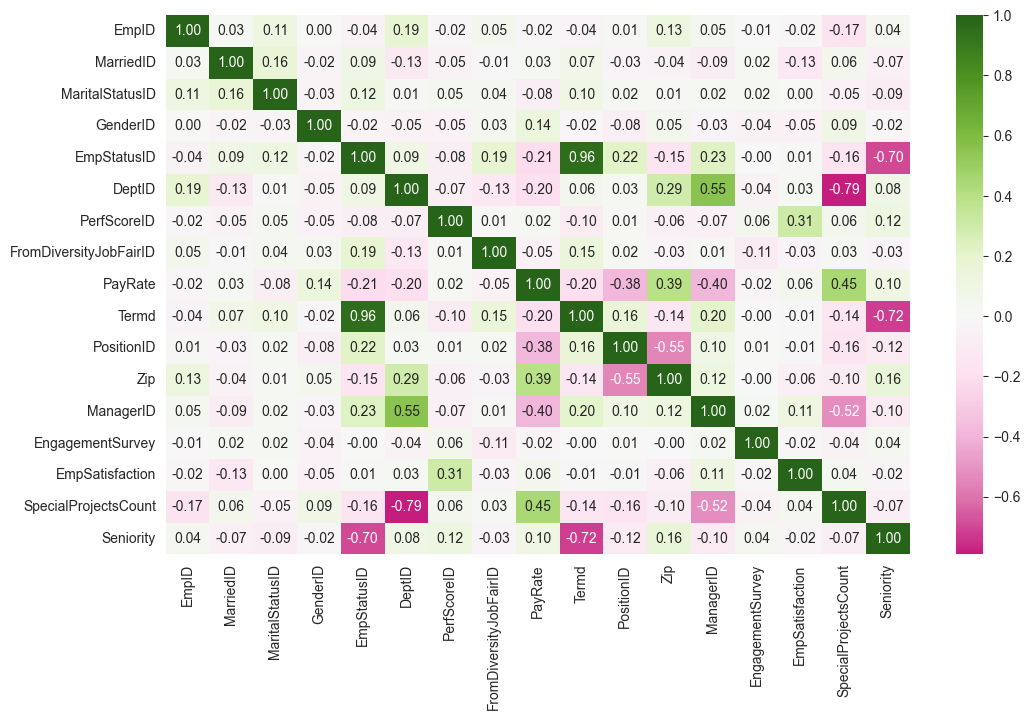

In [163]:
# 3 Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
df[['MaritalDesc', 'MaritalStatusID']]
datacheck=df.loc[df['MaritalDesc'] == 'Married']
datacheck['MaritalStatusID'].value_counts()
# Nie wiem czy to wyżej potrzebne, a jeśli tak to w jakiej formie najlepiej to zrobić?
print('Nie ma żadnej koralacji między stanem cywilnym, a zadowoleniem z pracy')
#sns.boxplot(y='EmpSatisfaction',x='MaritalStatusID',data=df) - też można coś takiego?

plt.figure(figsize = (12.0,7.0))
sns.heatmap(df.corr(),xticklabels= df.corr().columns.values,yticklabels=df.corr().columns.values, cmap = cm.PiYG, center = 0., annot = True, fmt = '.2f' )
plt.show()


C:\Users\pawit\AppData\Local\Temp\ipykernel_19348\64307736.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age=df1[(df['Age'] > 0)]


<AxesSubplot:xlabel='Age', ylabel='Count'>

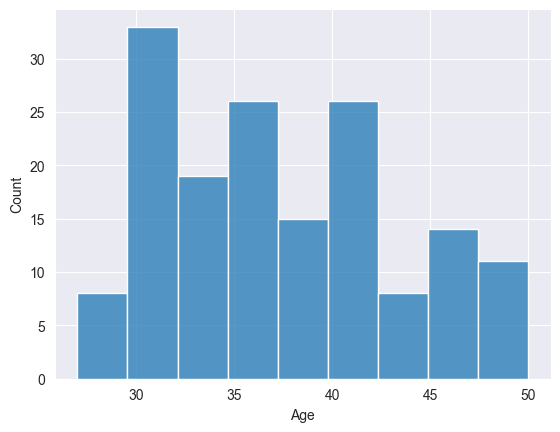

In [164]:
# 4 Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
#df['DOB'].dt.year()
agedate= dt.datetime(2019,9,27)
df['Age']=df.apply(lambda x:  (agedate.year - x['DOB'].year), axis=1)
df['Age']
df1=df.loc[df['EmpStatusID'] == 1]
#założyłem, że ludzi urodzonych po 2019 nie bierzemy pod uwagę (było tego całkiem sporo swoją drogą - czy należy coś z tym zrobić na początku)
age=df1[(df['Age'] > 0)]
sns.histplot(data=age, x=age['Age'])




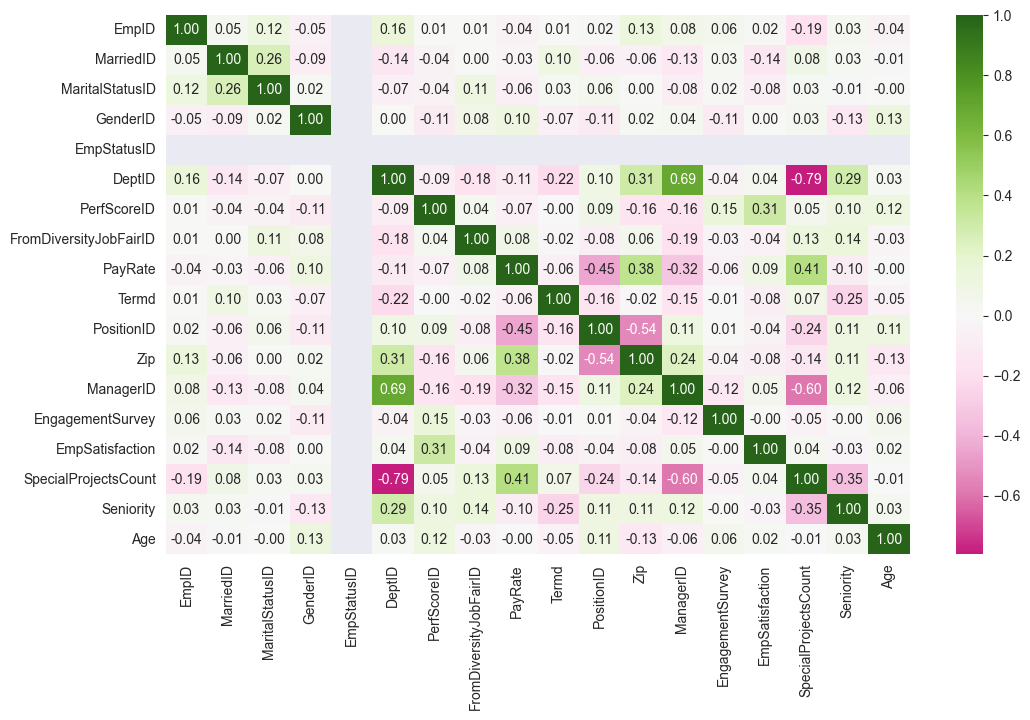

Korelacja jest minimalnie ujemna (-0.01) więc nie


In [165]:
# 5 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
plt.figure(figsize = (12.0,7.0))
sns.heatmap(age.corr(),xticklabels= age.corr().columns.values,yticklabels=age.corr().columns.values, cmap = cm.PiYG, center = 0., annot = True, fmt = '.2f' )
plt.show()
print('Korelacja jest minimalnie ujemna (-0.01) więc nie')

